In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [10]:
weather_data = pd.read_csv('data/weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [11]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [12]:
weather_data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [13]:
nan_count = weather_data['Precip Type'].isna().sum()
nan_count

517

In [14]:
weather_data = weather_data.dropna(subset=['Precip Type'])
weather_data['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [15]:
weather_data_1 = weather_data.copy()


In [16]:
weather_data_2 = weather_data_1.drop(columns=['Formatted Date', 'Daily Summary'], axis=1)
weather_data_2.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

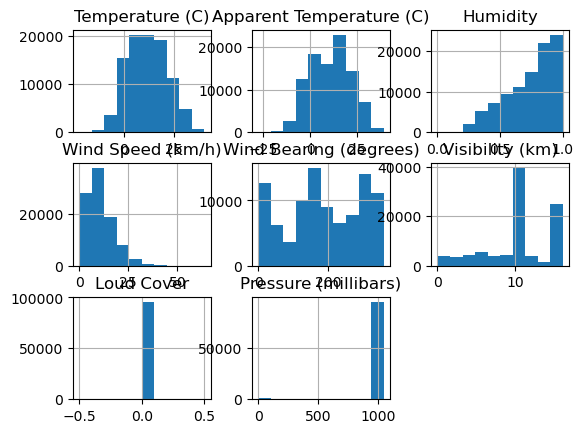

In [17]:
weather_data_2.hist()

In [18]:
weather_data_2['Summary'].value_counts()

Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [19]:
#if unable to increase NN accuracy, decrease features for the onehotencoder here...
cutoff = 100
weather_columns_toreplace = []
for i in weather_data_2['Summary'].value_counts().index:
    if weather_data_2['Summary'].value_counts()[i] <cutoff:
        weather_columns_toreplace.append(i)

#replace in dataframe
for i in weather_columns_toreplace:
    weather_data_2['Summary'] = weather_data_2['Summary'].replace(i, "Other")

In [20]:
weather_data_2['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

In [21]:
weather_data_2['Precip Type'] = weather_data_2['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)

In [22]:
weather_data_2['Precip Type'].value_counts()

Precip Type
1    85224
0    10712
Name: count, dtype: int64

In [23]:
weather_data_2.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

In [24]:
#create a transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']),
    (OneHotEncoder(handle_unknown='ignore'), ['Summary'])
)

# set features and target
X = weather_data_2.drop(columns=['Precip Type'])
y = weather_data_2['Precip Type']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    shuffle=True
                                                    )

#fit the training data
X_train_normal = ct.fit_transform(X_train)

#transform the training and the testing data
X_test_normal = ct.transform(X_test)

In [25]:

X_train_normal.shape, X_test_normal.shape, X_train_normal[0], X_test_normal[0]

((76748, 17),
 (19188, 17),
 array([0.68706182, 0.72363516, 0.58      , 0.27786183, 0.88857939,
        0.7       , 0.        , 0.96651312, 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ]),
 array([0.33688428, 0.34943252, 0.92      , 0.17650025, 0.36211699,
        0.5       , 0.        , 0.97631835, 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ]))

In [26]:
X_train_normal = X_train_normal.astype(np.float32)
X_test_normal = X_test_normal.astype(np.float32)

In [27]:
#set random_seed state
tf.random.set_seed(42)

#build model
weather_model = tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(1)
]) 

#compile the model
weather_model.compile(loss=tf.keras.losses.mae, 
                      optimizer=tf.keras.optimizers.RMSprop(),
                      metrics=['accuracy', 'mae']
                      )

#train the model
history = weather_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100


2399/2399 [==============================] - 2s 849us/step - loss: 0.1383 - accuracy: 0.8795 - mae: 0.1383
Epoch 2/100
2399/2399 [==============================] - 2s 834us/step - loss: 0.1249 - accuracy: 0.8878 - mae: 0.1249
Epoch 3/100
2399/2399 [==============================] - 4s 1ms/step - loss: 0.1233 - accuracy: 0.8878 - mae: 0.1233
Epoch 4/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.1224 - accuracy: 0.8878 - mae: 0.1224
Epoch 5/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.1215 - accuracy: 0.8878 - mae: 0.1215
Epoch 6/100
2399/2399 [==============================] - 6s 2ms/step - loss: 0.1209 - accuracy: 0.8878 - mae: 0.1209
Epoch 7/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.1201 - accuracy: 0.8878 - mae: 0.1201
Epoch 8/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.1197 - accuracy: 0.8878 - mae: 0.1197
Epoch 9/100
2399/2399 [==============================] - 3s 1ms/step - l

600/600 [==============================] - 2s 3ms/step - loss: 0.1111 - accuracy: 0.8907 - mae: 0.1111


Text(0, 0.5, 'loss')

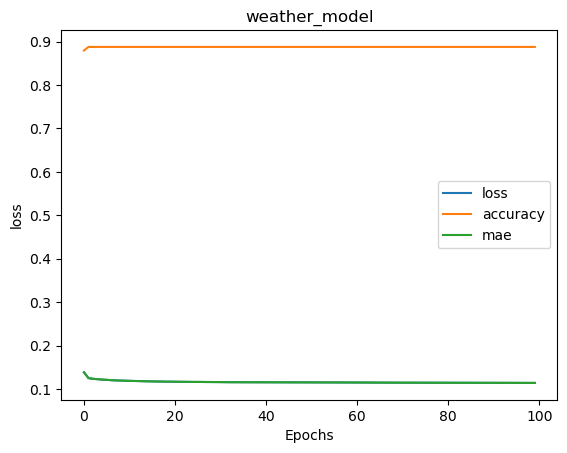

In [28]:
weather_model.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.title('weather_model')
plt.xlabel('Epochs')
plt.ylabel('loss')

adjusting learning rate


In [29]:
#set random_seed state
tf.random.set_seed(42)

#build model
weather_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(1)
]) 

#compile the model
weather_model_1.compile(loss=tf.keras.losses.mae, 
                      optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
                      metrics=['accuracy', 'mae']
                      )

#train the model
history = weather_model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100


2399/2399 [==============================] - 3s 1ms/step - loss: 0.5271 - accuracy: 0.5150 - mae: 0.5271
Epoch 2/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.2907 - accuracy: 0.8400 - mae: 0.2907
Epoch 3/100
2399/2399 [==============================] - 4s 2ms/step - loss: 0.2004 - accuracy: 0.8943 - mae: 0.2004
Epoch 4/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.1637 - accuracy: 0.8934 - mae: 0.1637
Epoch 5/100
2399/2399 [==============================] - 4s 2ms/step - loss: 0.1528 - accuracy: 0.8890 - mae: 0.1528
Epoch 6/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.1448 - accuracy: 0.8878 - mae: 0.1448
Epoch 7/100
2399/2399 [==============================] - 4s 1ms/step - loss: 0.1387 - accuracy: 0.8878 - mae: 0.1387
Epoch 8/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.1344 - accuracy: 0.8874 - mae: 0.1344
Epoch 9/100
2399/2399 [==============================] - 3s 1ms/step - loss:

600/600 [==============================] - 1s 778us/step - loss: 0.1095 - accuracy: 0.8907 - mae: 0.1095


Text(0, 0.5, 'Loss')

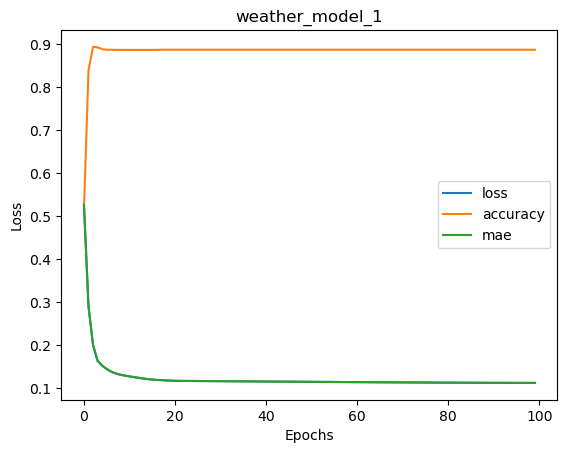

In [30]:
weather_model_1.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.title('weather_model_1')
plt.xlabel('Epochs')
plt.ylabel('Loss')

adding one more hidden layer, introducing a EarlyStopping layer

In [31]:
#set random_seed state
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping("accuracy", patience=3)

#build model
weather_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
]) 

#compile the model
weather_model_2.compile(loss=tf.keras.losses.mae, 
                      optimizer=tf.keras.optimizers.RMSprop(),
                      metrics=['accuracy', 'mae']
                      )

#train the model
history = weather_model_2.fit(X_train_normal, y_train, epochs=100, callbacks=callback)

Epoch 1/100


2399/2399 [==============================] - 4s 1ms/step - loss: 0.1327 - accuracy: 0.8862 - mae: 0.1327
Epoch 2/100
2399/2399 [==============================] - 2s 1ms/step - loss: 0.1249 - accuracy: 0.8878 - mae: 0.1249
Epoch 3/100
2399/2399 [==============================] - 2s 937us/step - loss: 0.1224 - accuracy: 0.8878 - mae: 0.1224
Epoch 4/100
2399/2399 [==============================] - 4s 2ms/step - loss: 0.1208 - accuracy: 0.8878 - mae: 0.1208
Epoch 5/100
2399/2399 [==============================] - 2s 966us/step - loss: 0.1199 - accuracy: 0.8878 - mae: 0.1199


600/600 [==============================] - 1s 861us/step - loss: 0.1209 - accuracy: 0.8907 - mae: 0.1209


Text(0, 0.5, 'Loss')

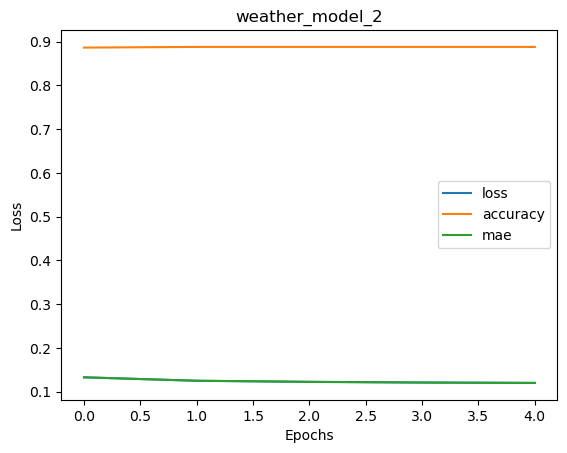

In [32]:
weather_model_2.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.title('weather_model_2')
plt.xlabel('Epochs')
plt.ylabel('Loss')

decreasing the first layer neurons

In [33]:
#set random_seed state
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping("loss", patience=3)

#build model
weather_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
]) 

#compile the model
weather_model_3.compile(loss=tf.keras.losses.mae, 
                      optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.000001),
                      metrics=['accuracy', 'mae']
                      )

#train the model
history = weather_model_3.fit(X_train_normal, y_train, epochs=100, callbacks=callback)

Epoch 1/100


2399/2399 [==============================] - 4s 1ms/step - loss: 1.1527 - accuracy: 0.1162 - mae: 1.1527
Epoch 2/100
2399/2399 [==============================] - 2s 957us/step - loss: 1.0909 - accuracy: 0.1277 - mae: 1.0909
Epoch 3/100
2399/2399 [==============================] - 2s 989us/step - loss: 1.0310 - accuracy: 0.1449 - mae: 1.0310
Epoch 4/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.9728 - accuracy: 0.1694 - mae: 0.9728
Epoch 5/100
2399/2399 [==============================] - 2s 951us/step - loss: 0.9157 - accuracy: 0.2028 - mae: 0.9157
Epoch 6/100
2399/2399 [==============================] - 2s 954us/step - loss: 0.8592 - accuracy: 0.2394 - mae: 0.8592
Epoch 7/100
2399/2399 [==============================] - 3s 1ms/step - loss: 0.8034 - accuracy: 0.2853 - mae: 0.8034
Epoch 8/100
2399/2399 [==============================] - 2s 927us/step - loss: 0.7480 - accuracy: 0.3356 - mae: 0.7480
Epoch 9/100
2399/2399 [==============================] - 2s 964us/

600/600 [==============================] - 1s 776us/step - loss: 0.1230 - accuracy: 0.8861 - mae: 0.1230


Text(0, 0.5, 'Loss')

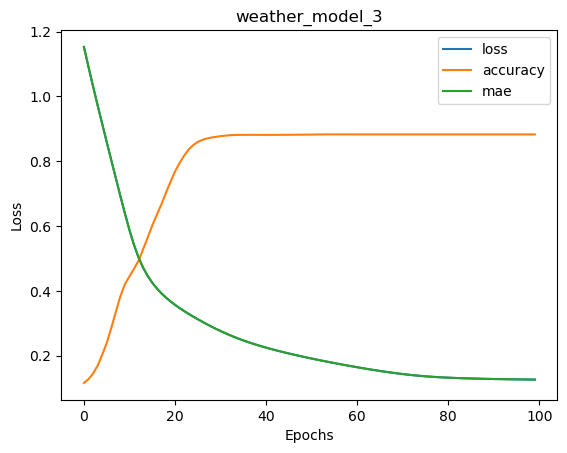

In [34]:
weather_model_3.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.title('weather_model_3')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [35]:
#set random_seed state
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping("mae", patience=3)

#build model
weather_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 

#compile the model
weather_model_4.compile(loss=tf.keras.losses.mae, 
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
                      metrics=['accuracy', 'mae']
                      )

#train the model
history = weather_model_4.fit(X_train_normal, y_train, epochs=100, callbacks=callback)

Epoch 1/100
2399/2399 [==============================] - 3s 931us/step - loss: 0.4472 - accuracy: 0.7158 - mae: 0.4472
Epoch 2/100
2399/2399 [==============================] - 2s 949us/step - loss: 0.4313 - accuracy: 0.7982 - mae: 0.4313
Epoch 3/100
2399/2399 [==============================] - 2s 914us/step - loss: 0.4142 - accuracy: 0.8560 - mae: 0.4142
Epoch 4/100
2399/2399 [==============================] - 2s 926us/step - loss: 0.3968 - accuracy: 0.8741 - mae: 0.3968
Epoch 5/100
2399/2399 [==============================] - 2s 945us/step - loss: 0.3777 - accuracy: 0.8812 - mae: 0.3777
Epoch 6/100
2399/2399 [==============================] - 2s 918us/step - loss: 0.3588 - accuracy: 0.8852 - mae: 0.3588
Epoch 7/100
2399/2399 [==============================] - 2s 904us/step - loss: 0.3403 - accuracy: 0.8864 - mae: 0.3403
Epoch 8/100
2399/2399 [==============================] - 2s 903us/step - loss: 0.3224 - accuracy: 0.8874 - mae: 0.3224
Epoch 9/100
2399/2399 [=========================

KeyboardInterrupt: 

600/600 [==============================] - 0s 642us/step - loss: 0.1093 - accuracy: 0.8907 - mae: 0.1093


Text(0, 0.5, 'Loss')

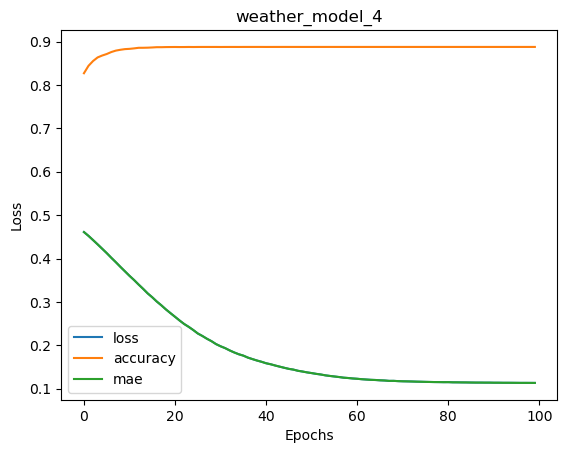

In [ ]:
weather_model_4.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.title('weather_model_4')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
#set random_seed state
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping("mae", patience=3)

#build model
weather_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 

#compile the model
weather_model_5.compile(loss=tf.keras.losses.mae, 
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                      metrics=['accuracy', 'mae']
                      )

#train the model
history = weather_model_5.fit(X_train_normal, y_train, epochs=100, callbacks=callback)

Epoch 1/100
2399/2399 [==============================] - 2s 769us/step - loss: 0.5409 - accuracy: 0.3623 - mae: 0.5409
Epoch 2/100
2399/2399 [==============================] - 2s 761us/step - loss: 0.3949 - accuracy: 0.7815 - mae: 0.3949
Epoch 3/100
2399/2399 [==============================] - 2s 764us/step - loss: 0.2929 - accuracy: 0.8756 - mae: 0.2929
Epoch 4/100
2399/2399 [==============================] - 2s 760us/step - loss: 0.2283 - accuracy: 0.8871 - mae: 0.2283
Epoch 5/100
2399/2399 [==============================] - 2s 763us/step - loss: 0.1903 - accuracy: 0.8878 - mae: 0.1903
Epoch 6/100
2399/2399 [==============================] - 2s 756us/step - loss: 0.1702 - accuracy: 0.8878 - mae: 0.1702
Epoch 7/100
2399/2399 [==============================] - 2s 769us/step - loss: 0.1576 - accuracy: 0.8878 - mae: 0.1576
Epoch 8/100
2399/2399 [==============================] - 2s 757us/step - loss: 0.1494 - accuracy: 0.8878 - mae: 0.1494
Epoch 9/100
2399/2399 [=========================

600/600 [==============================] - 0s 641us/step - loss: 0.1093 - accuracy: 0.8907 - mae: 0.1093


Text(0, 0.5, 'Loss')

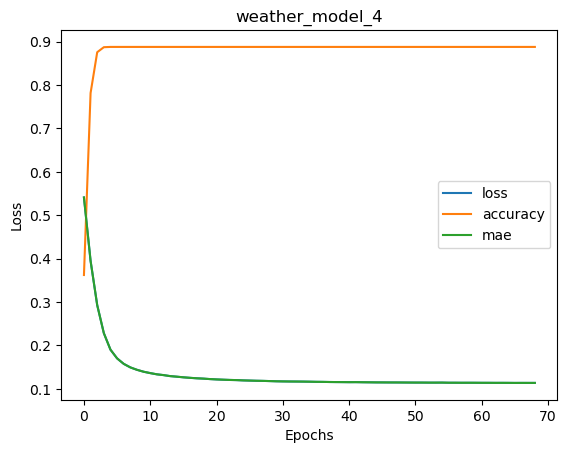

In [ ]:
weather_model_5.evaluate(X_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.title('weather_model_4')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
import kerastuner as kt
from keras.regularizers import l1

#build a keras tuner model
def model(hp):

    model = tf.keras.Sequential()

    #set activation functions to be utilized
    activation = hp.Choice("activation", ['relu', 'tanh', 'sigmoid', 'swish'])

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 2e-1, 3e-1, 1e-2, 2e-2, 3e-2, 1e-3, 2e-3, 3e-3, 1e-4, 1e-5, 1e-6, 1e-7])

    model.add(tf.keras.layers.Dense(units=hp.Int('units',
                                                 min_value=1,
                                                 max_value=512,
                                                 step=8),
                                                 activation=activation,
                                                 input_dim=17
                                                 ))
    
    #Allow keras tuner to select the number of hidden layers and the neurons associated with each
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                     min_value=1,
                                                     max_value=512,
                                                     step=8),
                                                     activation=activation,
                                                     kernel_regularizer=tf.keras.regularizers.l1(l=hp.Choice('l1_weight', [0.1, 0.01, 0.001, 0.0001]))
                                                     ))
    #add drop out layer
    model.add(tf.keras.layers.Dropout(hp.Choice('dropout', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    ))

    #final layer output
    model.add(tf.keras.layers.Dense(1, activation=activation))

    #compile the model

    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics=['accuracy','mae'])

    return model

#set call back
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#design tuner which will utilize the previous code to find the optimum setting
tuner = kt.Hyperband(
    model,
    objective=['accuracy'],
    max_epochs=1000,
    project_name='weather_model_kt')

#run keras tuner to find model
tuner.search(X_train_normal, y_train, epochs=1000, validation_split=0.1, callbacks=[callback])

#get the optimal hyperparamaters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

#print tuner results
tuner.results_summary()

Using TensorFlow backend


C:\Users\eeels\AppData\Local\Temp\ipykernel_10836\2915972766.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Reloading Tuner from .\weather_model_kt\tuner0.json
Results summary
Results in .\weather_model_kt
Showing 10 best trials
MultiObjective(name="multi_objective", direction="min"): [Objective(name="accuracy", direction="max")]

Trial 2007 summary
Hyperparameters:
activation: relu
learning_rate: 1e-05
units: 297
num_layers: 7
units_0: 113
l1_weight: 0.0001
dropout: 0.1
units_1: 105
units_2: 209
units_3: 121
units_4: 201
units_5: 41
units_6: 425
units_7: 153
units_8: 409
units_9: 153
tuner/epochs: 334
tuner/initial_epoch: 112
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 1989
Score: -0.9936589002609253

Trial 2013 summary
Hyperparameters:
activation: relu
learning_rate: 1e-05
units: 297
num_layers: 7
units_0: 113
l1_weight: 0.0001
dropout: 0.1
units_1: 105
units_2: 209
units_3: 121
units_4: 201
units_5: 41
units_6: 425
units_7: 153
units_8: 409
units_9: 153
tuner/epochs: 1000
tuner/initial_epoch: 334
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 2007
Score: -0.9934706687927246

Trial 12

In [38]:
#build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_normal, y_train, epochs=1000, callbacks=[callback])

#grabs val_accuracy
val_acc_per_epoch = history.history['accuracy']

#prints the best iteration of model
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) +1
print(f'Best epoch: {best_epoch}')

eval_results = model.evaluate(X_test_normal, y_test)
print(f"[test loss, test accuracy]: {eval_results}")

#export our mode to HDF5 file:
model.save('weather_model_kt.H5')

NameError: name 'tuner' is not defined

Text(0, 0.5, 'Loss')

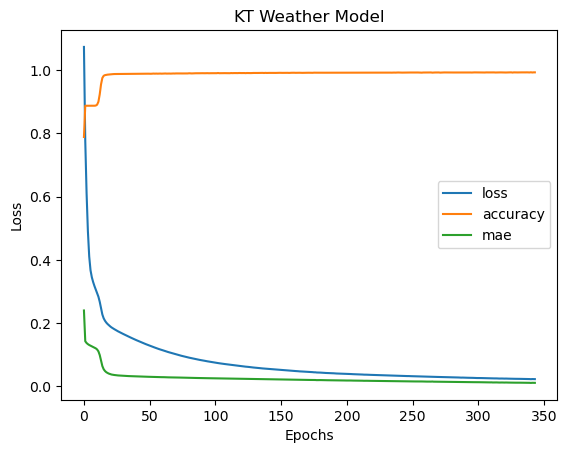

In [ ]:
#plot history
pd.DataFrame(history.history).plot()
plt.title("KT Weather Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [39]:
import tensorflow as tf
#load best model from keras tuner training
best_model = tf.keras.models.load_model('weather_model_kt.H5')

In [43]:
best_model.evaluate(X_test_normal, y_test)

600/600 [==============================] - 1s 1ms/step - loss: 0.0181 - accuracy: 0.9944 - mae: 0.0063


[0.01807633601129055, 0.9943714737892151, 0.006319561507552862]

In [40]:
best_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 297)               5346      
                                                                 
 dense_27 (Dense)            (None, 113)               33674     
                                                                 
 dense_28 (Dense)            (None, 105)               11970     
                                                                 
 dense_29 (Dense)            (None, 209)               22154     
                                                                 
 dense_30 (Dense)            (None, 121)               25410     
                                                                 
 dense_31 (Dense)            (None, 201)               24522     
                                                                 
 dense_32 (Dense)            (None, 41)               

In [41]:
#Create a confusion matrix
#Note: the confusion matrix code we're about to write is a remix of scikitlearns confusion matrix code
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=20):

  #create the confusion matrix
  cm = confusion_matrix(y_true,  tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  #let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  #create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)  #second cm is colormap
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x axes labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  #plot the text on each  ecell
  for i,  j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

600/600 [==============================] - 1s 1ms/step


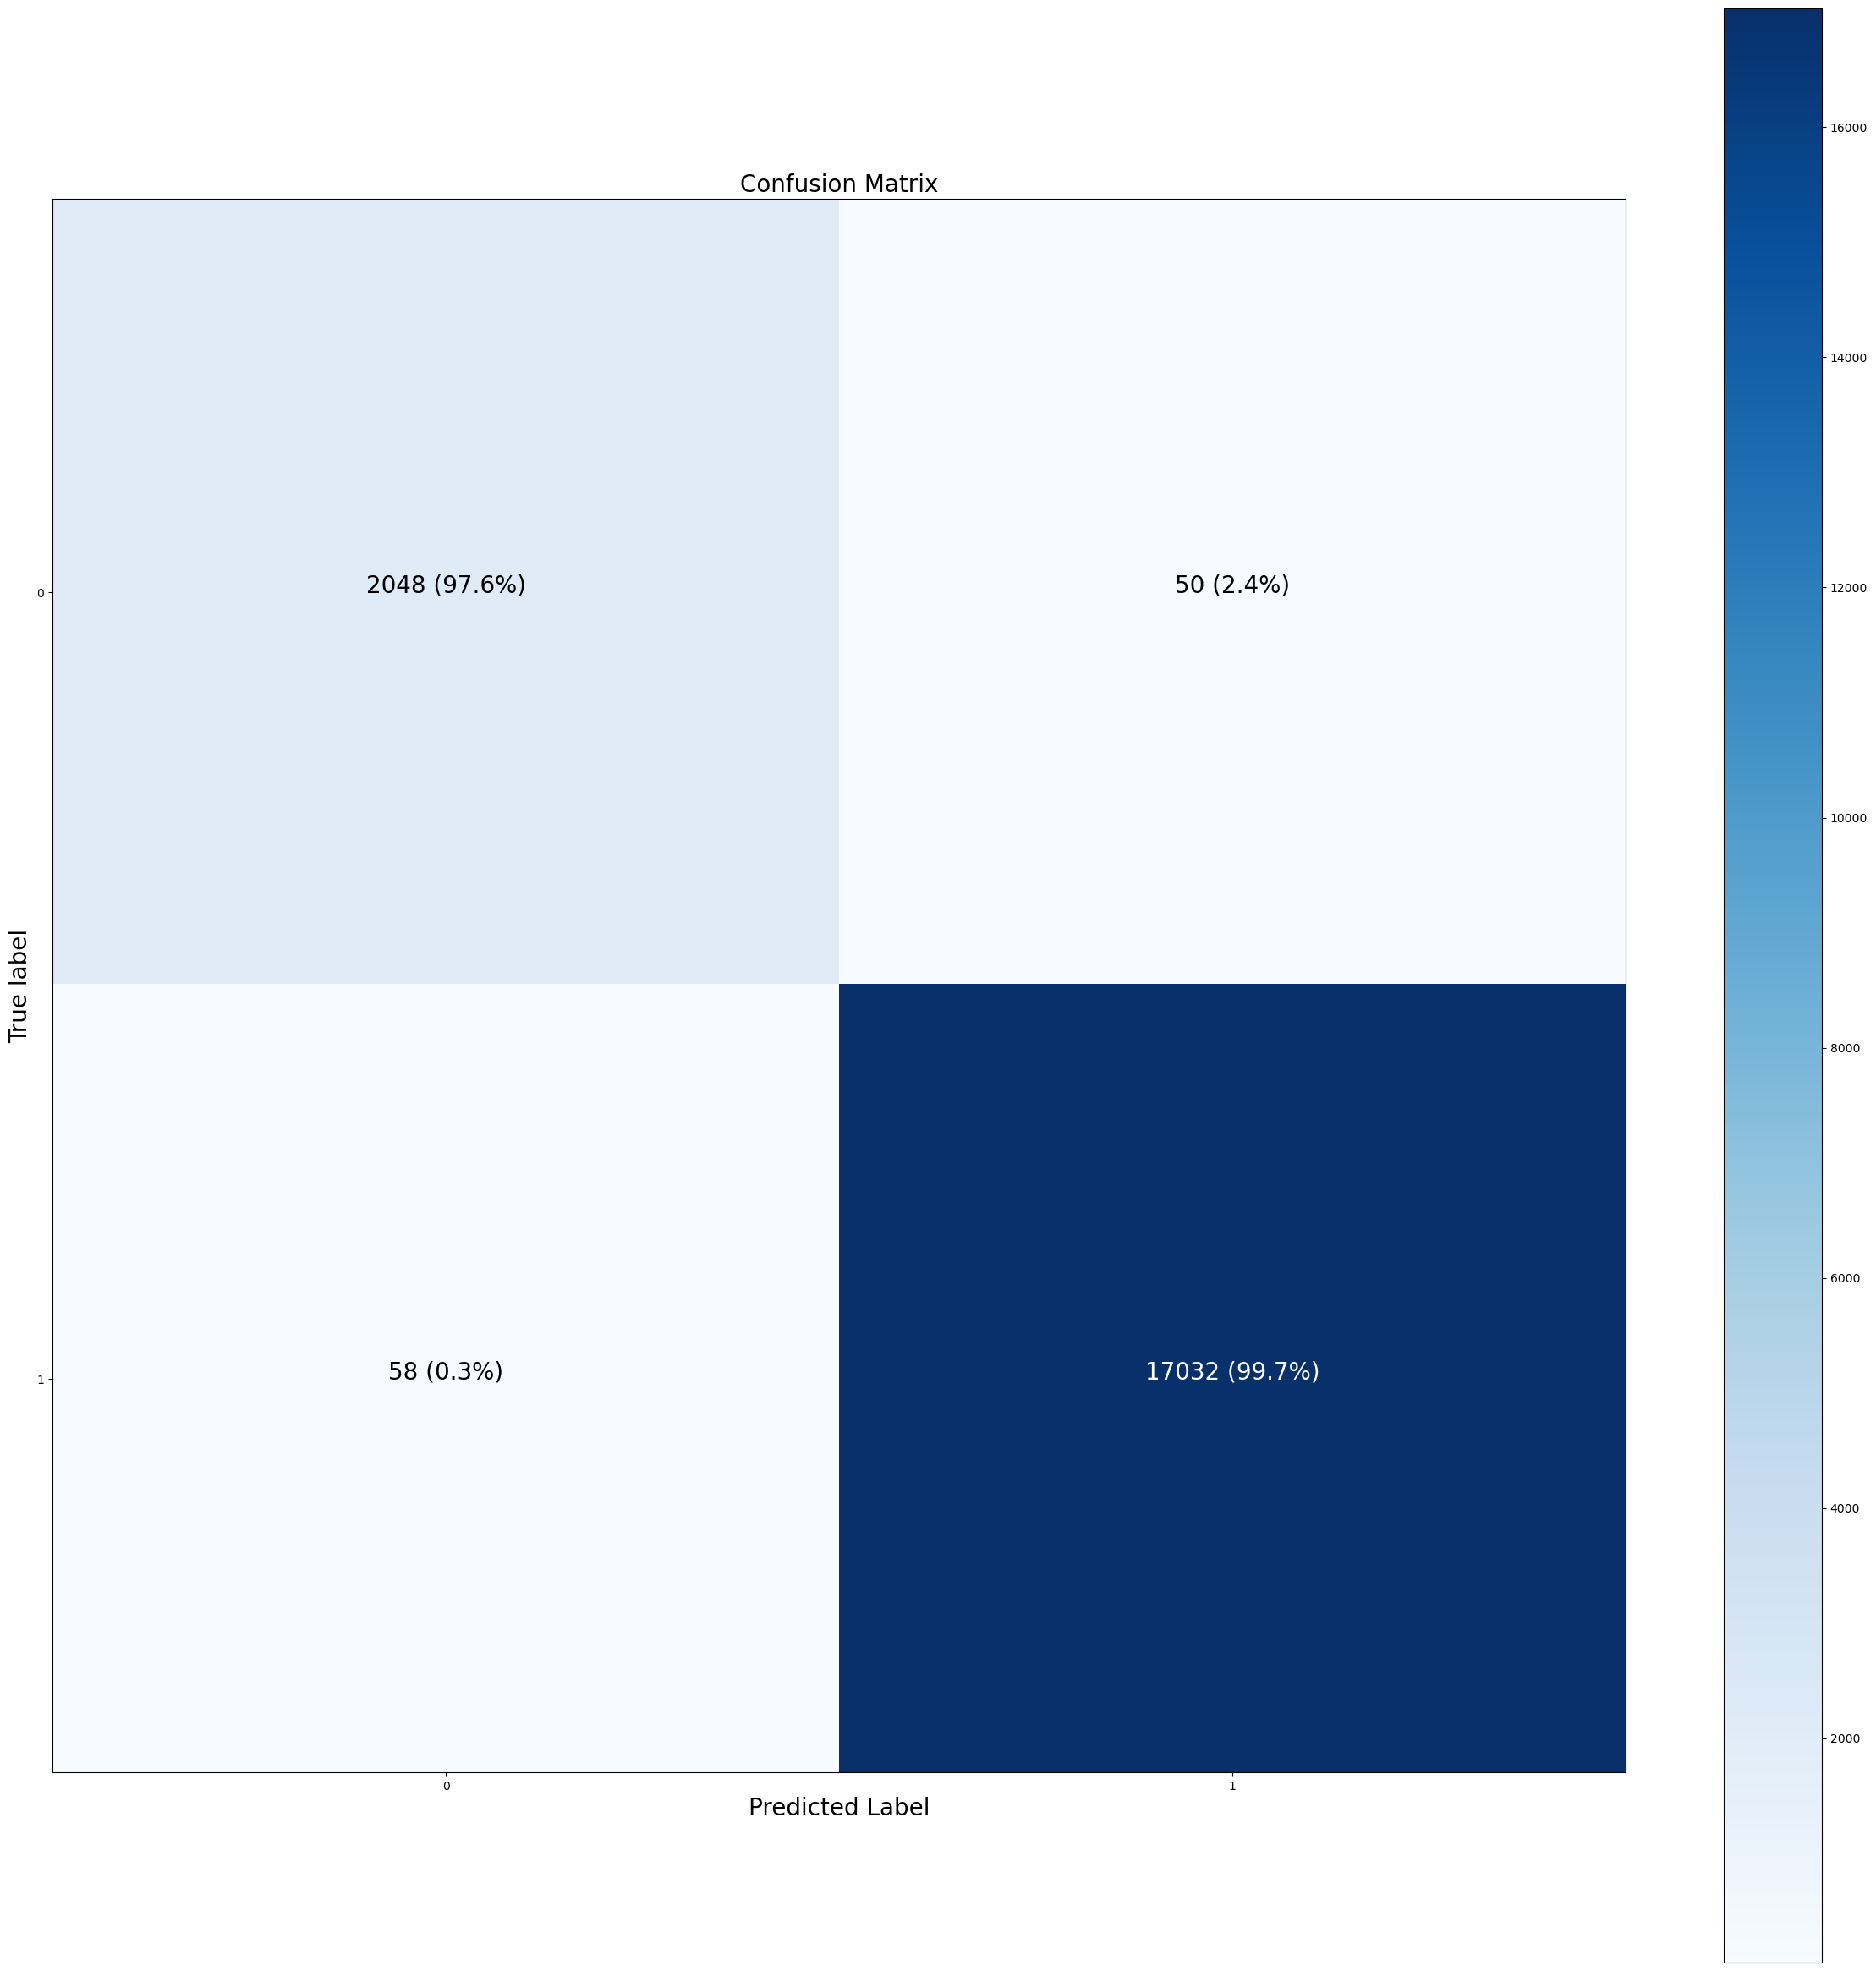

In [42]:
y_preds = best_model.predict(X_test_normal)
make_confusion_matrix(y_true=y_test, y_pred=y_preds, figsize=(30,30))